In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
m = 100
global flag
flag = 0

In [135]:
X = np.zeros(shape = (m,2))
Y = np.zeros(shape = (m,1))
f1 = open('./q4/q4x.dat','r')
f2 = open('./q4/q4y.dat','r')
cnt = 0
for x in f1:
    lt = x.split(' ')
#     X[cnt][0] = 1
    X[cnt][0] = lt[0]
    X[cnt][1] = lt[2]
    cnt += 1
cnt=0
for x in f2:
    if(x.split('\n')[0]=='Alaska'):
        Y[cnt][0] = 0
    else:
        Y[cnt][0] = 1
    cnt+=1

# Normalisation
temp = X[:,0].copy()
temp -= np.mean(X[:, 0])
temp /= np.std(X[:, 0])
X[:, 0] = temp
temp = X[:, 1].copy()
temp -= np.mean(X[:, 1])
temp /= np.std(X[:, 1])
X[:, 1] = temp

In [136]:
def oneCheck(var, ans):
    if var == ans:
        return 1
    return 0

In [137]:
phi = 0
for i in range(m):
    phi += oneCheck(Y[i][0], 1)/m

In [138]:
def get_y(x, c, a, b):
    return (c - a*x*1.0)/b

def get_quadratic(x, phi, mu0, mu1, sigma0, sigma1):
    global flag
    sigma0_inv = np.linalg.pinv(sigma0)
    sigma1_inv = np.linalg.pinv(sigma1)
    a = sigma1_inv[0][0]
    b = sigma1_inv[0][1]
    c = sigma1_inv[1][0]
    d = sigma1_inv[1][1]
    p = sigma0_inv[0][0]
    q = sigma0_inv[0][1]
    r = sigma0_inv[1][0]
    s = sigma0_inv[1][1]
    p1 = phi
    p0 = 1.0 - phi
    C = np.log(np.linalg.det(sigma0)) - np.log(np.linalg.det(sigma1)) + 2.0*np.log(p1) - 2.0*np.log(p0)
    u = d - s
    v = (-2.0 * d * mu1[1]) + (2.0 * s * mu0[1]) + (b * x) - (b * mu1[0]) + (c * x) - (c * mu1[0]) - (q * x) + (q * mu0[0]) - (r * x) + (r * mu0[0])
    w = C - (a * ((x - mu1[0])**2)) + (p * ((x - mu0[0])**2)) + (mu0[1] * (q + r) * (mu0[0] - x)) + (mu1[1] * (b + c) * (x - mu1[0])) - (d*(mu1[1] ** 2)) + (s*(mu0[1]**2))
    sqt = np.sqrt((v**2) + (4*u*w))
    if(flag == 0):
        A = a - p
        B = b + c - q - r
        C = d - s
        D = -2*a*mu1[0] - mu1[1]*(b + c) + 2*p*mu0[0] + mu0[1]*(q + r)
        E = (-2.0 * d * mu1[1]) + (2.0 * s * mu0[1]) - (b * mu1[0]) - (
            c * mu1[0]) + (q * mu0[0]) + (r * mu0[0])
        F = -C + (a * (mu1[0])**2) - (p * ((mu0[0])**2)) - (
            mu0[1] * (q + r) *
            (mu0[0])) + (mu1[1] * (b + c) *
                            (mu1[0])) + (d * (mu1[1]**2)) - (s * (mu0[1]**2))
        print('The value of discriminant is ' + str(B**2 - 4*A*C))
        print('The equation of decision boundary is a conic of the form : ')
        print(str(A) + 'x^2 + ' + str(B) + 'xy + ' + str(C) + 'y^2 + ' + str(D) + 'x + ' + str(E) + 'y + ' + str(F) + '\n')
        flag = 1
    return ( (0.5*(-v + sqt))/u , (0.5*(-v - sqt))/u )

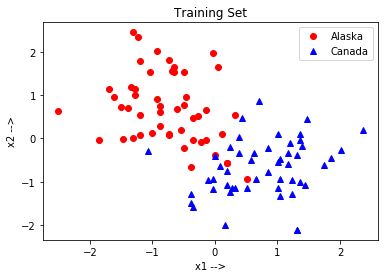

In [139]:
# Part b
plt.plot(X[:50,0], X[:50,1], "or", marker='o', label='Alaska')
plt.plot(X[50:,0], X[50:,1], "ob", marker='^', label='Canada')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('Training Set')
plt.legend()
plt.show(block=False)
# plt.savefig('./images/q2_b_normalized.png')

In [140]:
mu_0 = np.zeros(shape = (2,1))
numerator = 0
denominator = 0
for i in range(m):
    if(Y[i][0]==0):
        numerator += X[i,:]
        denominator += 1

# mu_0[0][0] = 1
mu_0[0][0] = (numerator/denominator)[0]
mu_0[1][0] = (numerator/denominator)[1]

mu_1 = np.zeros(shape = (2,1))
numerator = 0
denominator = 0
for i in range(m):
    if(Y[i][0]==1):
        numerator += X[i,:]
        denominator += 1

# mu_1[0][0] = 1
mu_1[0][0] = (numerator/denominator)[0]
mu_1[1][0] = (numerator/denominator)[1]

print(mu_0)


[[-0.75529433]
 [ 0.68509431]]


In [143]:
# Part a - Answers
sigma = np.zeros(shape = (2,2))
for i in range(m):
    if(Y[i][0]==0):
        some_i = X[i,:]-mu_0
    else:
        some_i = X[i,:]-mu_1
    sigma += np.dot(some_i.T, some_i)/m

print('Answers for part(a):')
print('1. mu_0\n',mu_0.T[0])
print('2. mu_1\n',mu_1.T[0])
print('3. Common sigma\n',sigma)

Answers for part(a):
1. mu_0
 [-0.75529433  0.68509431]
2. mu_1
 [ 0.75529433 -0.68509431]
3. sigma
 [[ 2.93378037 -0.04494456]
 [-0.04494456  3.136011  ]]


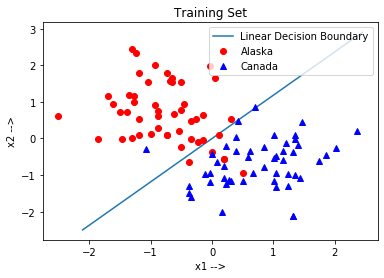

In [144]:
sigma_inv = np.linalg.pinv(sigma)
vec_1 = sigma_inv.dot(mu_0 - mu_1)
c = 0.5 * (((mu_0.T).dot(sigma_inv)).dot(mu_0) -
           ((mu_1.T).dot(sigma_inv)).dot(mu_1))

x_lines = [np.min(X[:, 1]), np.max(X[:, 1])]

# Part c - plotting the linear decision boundary
plt.plot(
    x_lines, [
        get_y(x_lines[0], c, vec_1[0][0], vec_1[1][0])[0],
        get_y(x_lines[1], c, vec_1[0][0], vec_1[1][0])[0]
    ],
    label='Linear Decision Boundary')
plt.plot(X[:50,0], X[:50,1], "or", marker='o', label='Alaska')
plt.plot(X[50:,0], X[50:,1], "ob", marker='^', label='Canada')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('Training Set')
plt.legend()
plt.show(block=False)
# plt.savefig('./images/q4_c_normalized.png')
plt.close()

In [145]:
# Part d - sigma_0 sigma_1 calculation
sigma_0 = np.zeros(shape = (2,2))
for i in range(m):
    if(Y[i][0]==0):
        some_i = X[i,:]-mu_0
        sigma_0 += np.dot(some_i.T, some_i)/(m*(1-phi))
print('sigma_0:\n',sigma_0)

sigma_1 = np.zeros(shape = (2,2))
for i in range(m):
    if(Y[i][0]==1):
        some_i = X[i,:]-mu_1
        sigma_1 += np.dot(some_i.T, some_i)/(m*phi)
print('sigma_1:\n',sigma_1)

sigma_0:
 [[ 2.83789898 -0.30973032]
 [-0.30973032  3.37019376]]
sigma_1:
 [[3.02966176 0.2198412 ]
 [0.2198412  2.90182824]]


In [155]:
#part d - generating 1000 (x,y) for quadratic line
num_points = 1000
x_all = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), num_points)
x_plot1 = []
x_plot2 = []
y_plot1 = []
y_plot2 = []
count = 0
for i in range(num_points):
    x = x_all[i]
    (y_val1, y_val2) = get_quadratic(x, phi, mu_0, mu_1, sigma_0, sigma_1)
    x_plot1.append(x)
    y_plot1.append(y_val1)
    if(count == 10):
        x_plot2.append(x)
        y_plot2.append(y_val2)
        count = 0
    count += 1



Plotting the data...



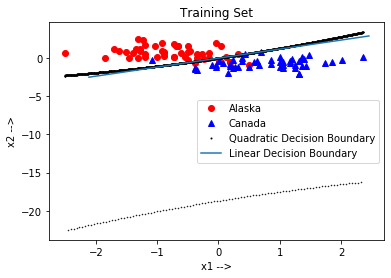

In [156]:
#plotting with the quadratic separator
print('\n\nPlotting the data...\n')
plt.figure()
# x1 = np.array([X[x, :] for x in label_0])
# x2 = np.array([X[x, :] for x in label_1])
plt.plot(X[:50,0], X[:50,1], 'ro', marker='o', label='Alaska')
plt.plot(X[50:,0], X[50:,1], 'bo', marker='^', label='Canada')
plt.xlabel('x1 -->')
plt.ylabel('x2 -->')
plt.title('Training Set')

#plotting the boundary
plt.plot(x_plot1,y_plot1,'ko',markersize = 1, label='Quadratic Decision Boundary')
plt.plot(x_plot2, y_plot2, 'ko', markersize=0.5)
plt.plot(x_lines, [get_y(x_lines[0], c, vec_1[0], vec_1[1])[0], get_y(x_lines[1], c, vec_1[0], vec_1[1])[0]], label='Linear Decision Boundary')
plt.legend()
plt.savefig('./images/q2_e.png')
plt.show(block=False)
plt.close()